In [82]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,7)


In [83]:
df = pd.read_csv('..\data\WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()
# alcune colonne sono da fattorizzare come gender, Partner, Dependents...

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [84]:
print(df.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [85]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [86]:
print('righe, colonne\n' + str(df.shape))

righe, colonne
(7043, 21)


In [87]:
print('percentuale di NaN\n' + str(df.isna().sum()/len(df)*100))
# non abbiamo nessun NaN nel dataset

percentuale di NaN
customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64


(array([5174.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1869.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

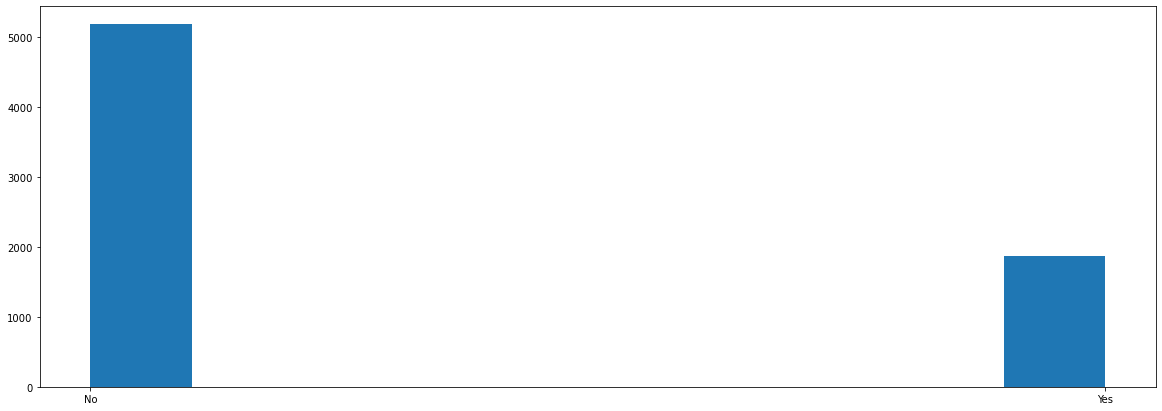

In [88]:
# clienti che hanno disdetto nell'ultimo mese
plt.hist(df.Churn)

(array([3488.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3555.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

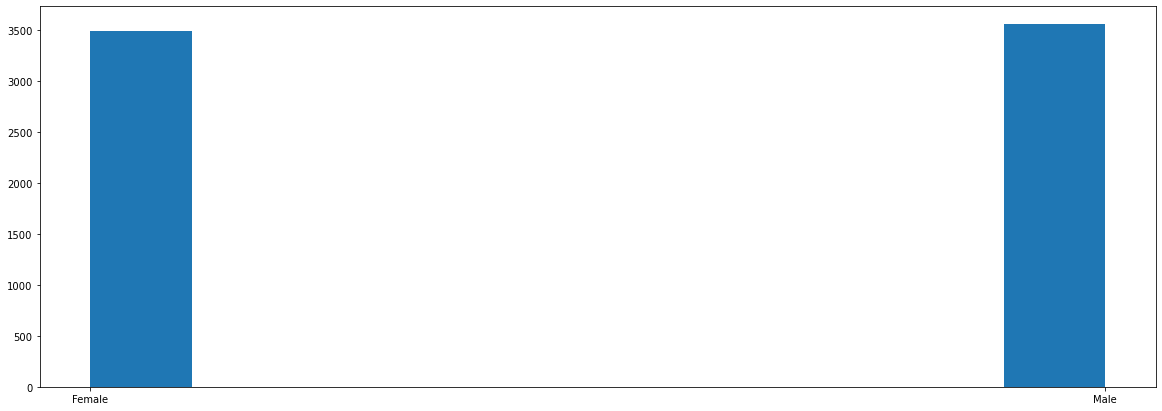

In [89]:
plt.hist(df.gender)

(array([1612.,  759.,  570.,  556.,  495.,  494.,  452.,  495.,  501.,
        1109.]),
 array([ 0. ,  7.2, 14.4, 21.6, 28.8, 36. , 43.2, 50.4, 57.6, 64.8, 72. ]),
 <BarContainer object of 10 artists>)

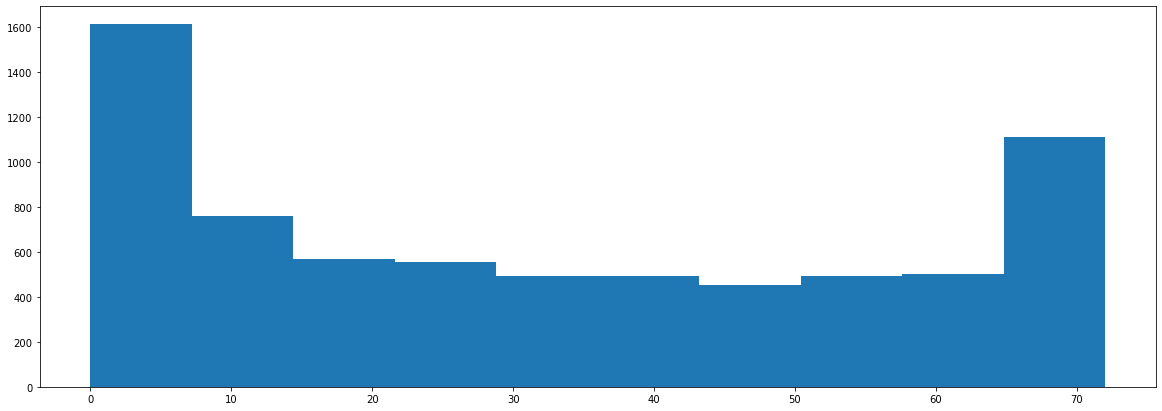

In [90]:
# numero di clienti che sono rimati per il numero di anni 
plt.hist(df.tenure)

(array([3875.,    0.,    0.,    0.,    0., 1473.,    0.,    0.,    0.,
        1695.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

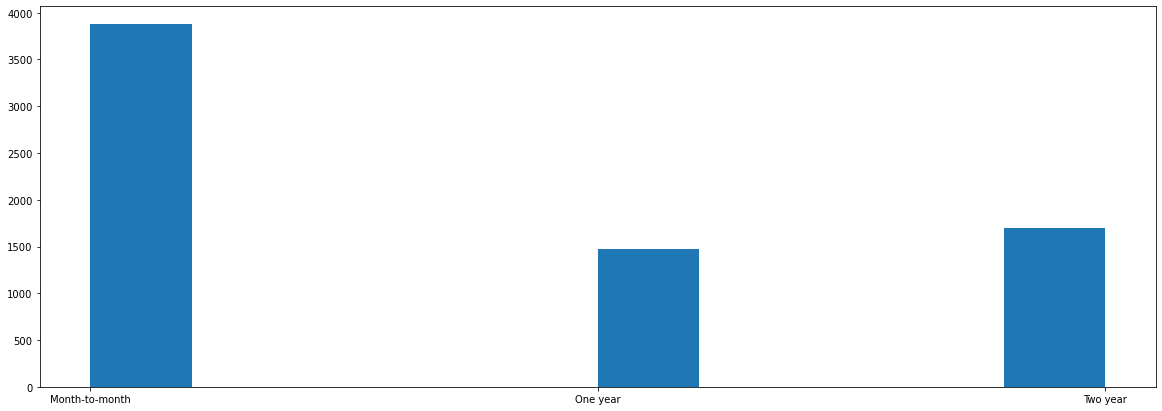

In [91]:
plt.hist(df.Contract)


In [92]:
# non abbiamo customer duplicati
df.customerID.duplicated(keep=False).any()

False

In [93]:
df.Churn.factorize()

(array([0, 0, 1, ..., 0, 1, 0], dtype=int64),
 Index(['No', 'Yes'], dtype='object'))

In [94]:
df.InternetService

0               DSL
1               DSL
2               DSL
3               DSL
4       Fiber optic
           ...     
7038            DSL
7039    Fiber optic
7040            DSL
7041    Fiber optic
7042    Fiber optic
Name: InternetService, Length: 7043, dtype: object

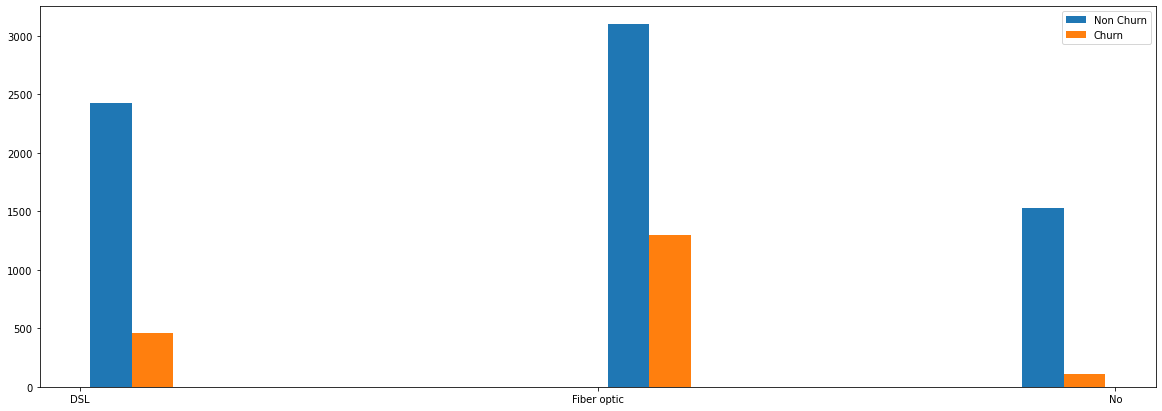

In [115]:

plt.hist([df.InternetService, df.InternetService.loc[df.Churn == 'Yes']], label = ['Non Churn', 'Churn'])

plt.legend()
# il maggiorn numero di churn sono quelli che possiedono la fibra ottica 

No handles with labels found to put in legend.


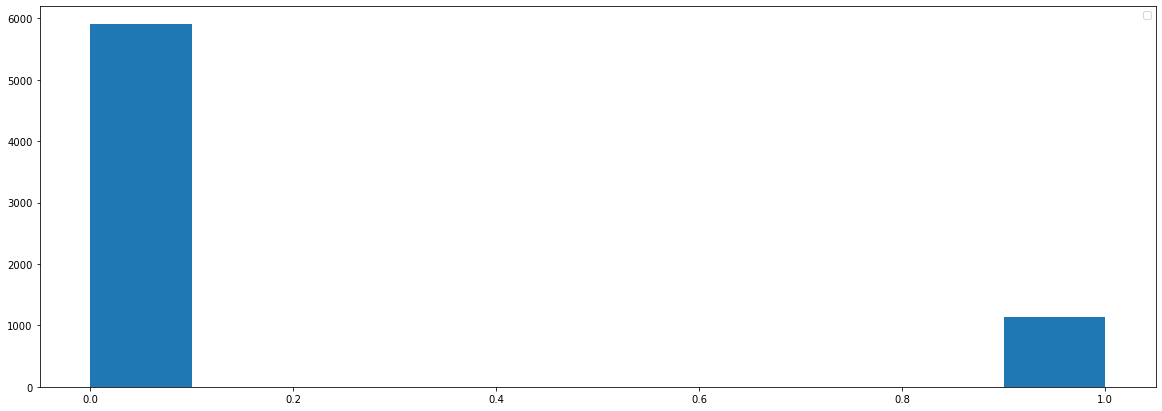

In [97]:
plt.hist(df.SeniorCitizen)
plt.legend()

(array([[5901.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         1142.],
        [1393.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          476.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 BarContainer objects>)

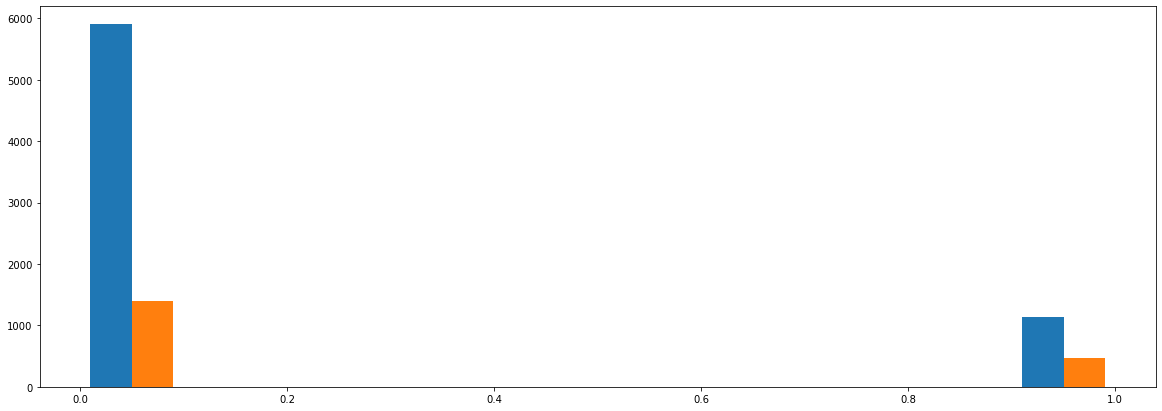

In [99]:
plt.hist([df.SeniorCitizen, df.SeniorCitizen.loc[df.Churn == 'Yes']], label = ['Non Churn', 'Churn'])
# i churn sono tanti giovani ma in percentuale sono più gli anzini

(array([[1606.,  191.,  365.,  639.,  473.,  895.,  953.,  869.,  758.,
          294.],
        [ 148.,   57.,  119.,  152.,   53.,  350.,  355.,  319.,  273.,
           43.]]),
 array([ 18.25,  28.3 ,  38.35,  48.4 ,  58.45,  68.5 ,  78.55,  88.6 ,
         98.65, 108.7 , 118.75]),
 <a list of 2 BarContainer objects>)

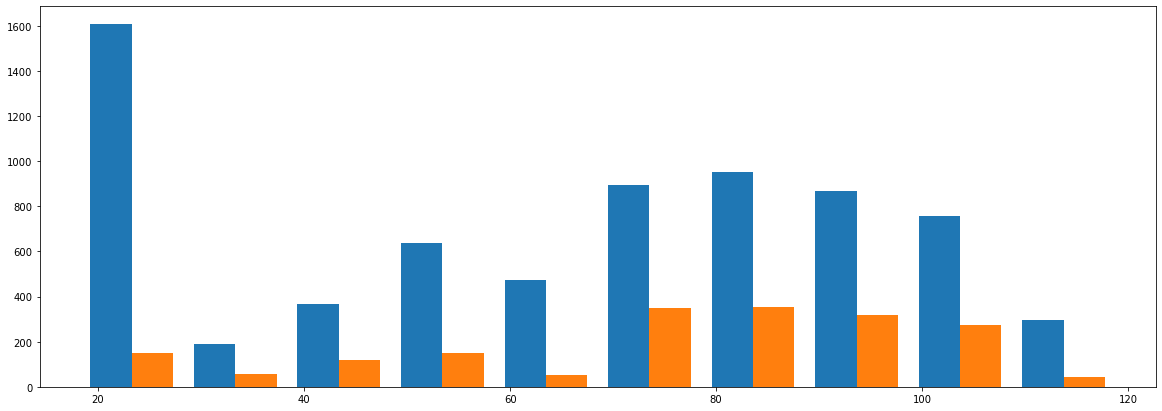

In [104]:
plt.hist([df.MonthlyCharges, df.MonthlyCharges.loc[df.Churn == 'Yes']], label = ['Non Churn', 'Churn'])


In [114]:
df.MonthlyCharges.shape[0]

1869

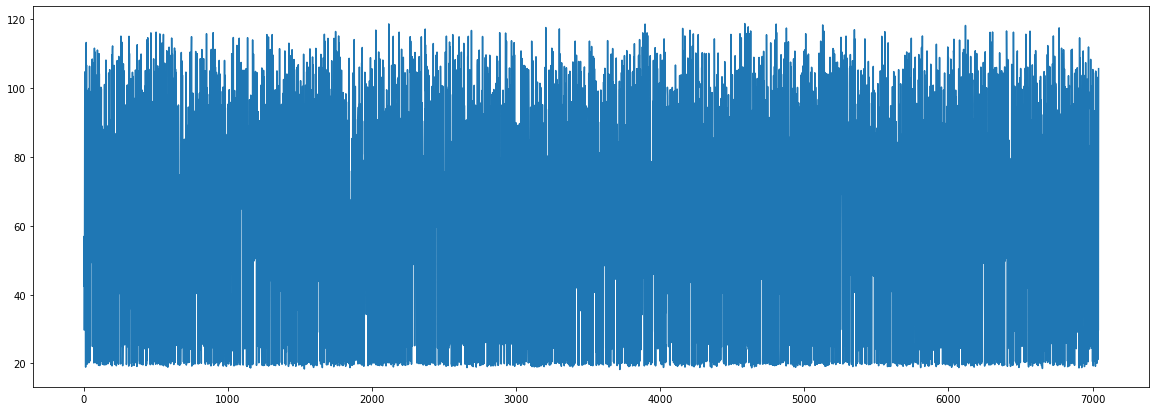

In [121]:
plt.plot(range(df.shape[0]), df.MonthlyCharges)